### Importação dos dados



In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [131]:
faturamento_loja = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()


In [132]:
print(f"Faturamento Total da loja: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Total da loja2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Total da loja3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Total da loja4: R$ {faturamento_loja4:,.2f}")


Faturamento Total da loja: R$ 1,534,509.12
Faturamento Total da loja2: R$ 1,488,459.06
Faturamento Total da loja3: R$ 1,464,025.03
Faturamento Total da loja4: R$ 1,384,497.58


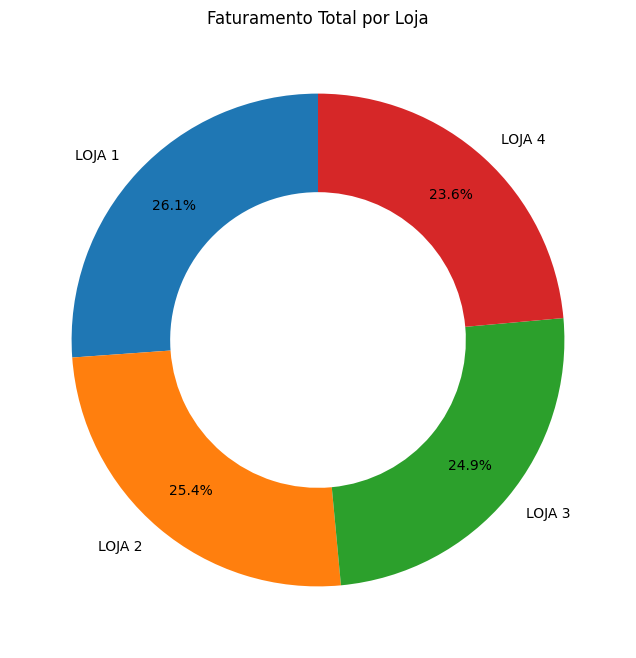

In [133]:
faturamento_total_por_loja = pd.Series([faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4],
                                      index=['LOJA 1', 'LOJA 2', 'LOJA 3', 'LOJA 4'])
faturamento_total_por_loja.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Faturamento Total por Loja', wedgeprops=dict(width=0.4), pctdistance=0.8)
plt.ylabel('') # Remove default 'None' label
plt.show()

# 2. Vendas por Categoria

In [134]:
quantidade_por_loja = (loja.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida'))
quantidade_por_loja2 = (loja2.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida'))
quantidade_por_loja3 = (loja3.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida'))
quantidade_por_loja4 = (loja4.groupby(['Categoria do Produto']).size().reset_index(name='Quantidade Vendida'))


In [135]:
print(f"Loja:\n {quantidade_por_loja}\n")
print(f"Loja2:\n {quantidade_por_loja2}\n")
print(f"Loja3:\n {quantidade_por_loja3}\n")
print(f"Loja4:\n {quantidade_por_loja4}")


Loja:
     Categoria do Produto  Quantidade Vendida
0             brinquedos                 324
1       eletrodomesticos                 312
2            eletronicos                 448
3        esporte e lazer                 284
4  instrumentos musicais                 182
5                 livros                 173
6                 moveis                 465
7  utilidades domesticas                 171

Loja2:
     Categoria do Produto  Quantidade Vendida
0             brinquedos                 313
1       eletrodomesticos                 305
2            eletronicos                 422
3        esporte e lazer                 275
4  instrumentos musicais                 224
5                 livros                 197
6                 moveis                 442
7  utilidades domesticas                 181

Loja3:
     Categoria do Produto  Quantidade Vendida
0             brinquedos                 315
1       eletrodomesticos                 278
2            eletronicos      

In [136]:
soma_quantidade_loja = quantidade_por_loja["Quantidade Vendida"].sum()
soma_quantidade_loja2 = quantidade_por_loja2["Quantidade Vendida"].sum()
soma_quantidade_loja3 = quantidade_por_loja3["Quantidade Vendida"].sum()
soma_quantidade_loja4 = quantidade_por_loja4["Quantidade Vendida"].sum()

print(f"Quantidade total de produtos vendidos na loja: {soma_quantidade_loja4}")


estatisticas_por_loja = pd.DataFrame({
    'Loja': ['LOJA 1', 'LOJA 2', 'LOJA 3', 'LOJA 4'],
    'Quantidade Total': [soma_quantidade_loja, soma_quantidade_loja2, soma_quantidade_loja3, soma_quantidade_loja4],
    'Quantidade Média': [quantidade_por_loja['Quantidade Vendida'].mean(), quantidade_por_loja2['Quantidade Vendida'].mean(), quantidade_por_loja3['Quantidade Vendida'].mean(), quantidade_por_loja4['Quantidade Vendida'].mean()]
})

estatisticas_por_loja.set_index('Loja', inplace=True)

print(estatisticas_por_loja)


Quantidade total de produtos vendidos na loja: 2358
        Quantidade Total  Quantidade Média
Loja                                      
LOJA 1              2359           294.875
LOJA 2              2359           294.875
LOJA 3              2359           294.875
LOJA 4              2358           294.750


# 3. Média de Avaliação das Lojas


In [137]:
media_avaliacoes_loja = loja.groupby('Categoria do Produto')['Avaliação da compra'].mean()
media_avaliacoes_loja2 = loja2.groupby('Categoria do Produto')['Avaliação da compra'].mean()
media_avaliacoes_loja3 = loja3.groupby('Categoria do Produto')['Avaliação da compra'].mean()
media_avaliacoes_loja4 = loja4.groupby('Categoria do Produto')['Avaliação da compra'].mean()



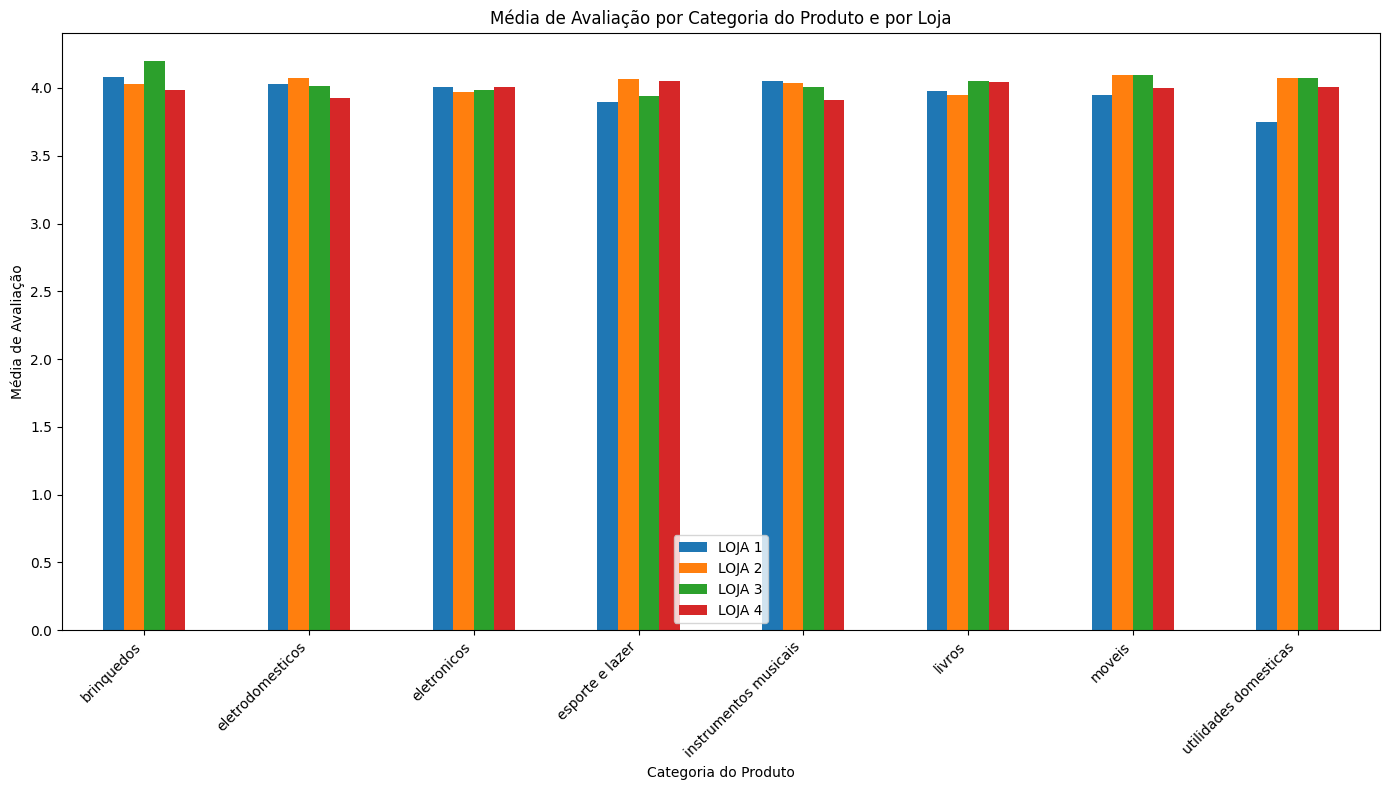

In [138]:
media_avaliacoes_combinada = pd.DataFrame({
    'LOJA 1': media_avaliacoes_loja,
    'LOJA 2': media_avaliacoes_loja2,
    'LOJA 3': media_avaliacoes_loja3,
    'LOJA 4': media_avaliacoes_loja4
})

media_avaliacoes_combinada.plot(kind='bar', figsize=(14, 8))
plt.title('Média de Avaliação por Categoria do Produto e por Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [139]:
print("--- AVALIAÇÃO MEDIA POR LOJA --- \n")
print(f"LOJA: \n{media_avaliacoes_loja}\n")
print(f"LOJA 2: \n{media_avaliacoes_loja2} \n")
print(f"LOJA 3: \n{media_avaliacoes_loja3} \n")
print(f"LOJA 4: \n{media_avaliacoes_loja4}")


--- AVALIAÇÃO MEDIA POR LOJA --- 

LOJA: 
Categoria do Produto
brinquedos               4.077160
eletrodomesticos         4.032051
eletronicos              4.004464
esporte e lazer          3.897887
instrumentos musicais    4.049451
livros                   3.976879
moveis                   3.946237
utilidades domesticas    3.748538
Name: Avaliação da compra, dtype: float64

LOJA 2: 
Categoria do Produto
brinquedos               4.025559
eletrodomesticos         4.072131
eletronicos              3.971564
esporte e lazer          4.065455
instrumentos musicais    4.035714
livros                   3.949239
moveis                   4.092760
utilidades domesticas    4.071823
Name: Avaliação da compra, dtype: float64 

LOJA 3: 
Categoria do Produto
brinquedos               4.196825
eletrodomesticos         4.010791
eletronicos              3.986696
esporte e lazer          3.938628
instrumentos musicais    4.005650
livros                   4.048649
moveis                   4.098196
utilidad

# 4. Produtos Mais e Menos Vendidos

In [140]:
mais_vendido_por_loja = (loja.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=False).head(10))
menos_vendido_por_loja = (loja.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=True).head(10))

mais_vendido_por_loja2 = (loja2.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=False).head(10))
menos_vendido_por_loja2 = (loja2.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=True).head(10))

mais_vendido_por_loja3 = (loja3.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=False).head(10))
menos_vendido_por_loja3 = (loja3.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=True).head(10))

mais_vendido_por_loja4 = (loja4.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=False).head(10))
menos_vendido_por_loja4 = (loja4.groupby(['Produto']).size().reset_index(name='Quantidade Vendida').sort_values('Quantidade Vendida', ascending=True).head(10))


In [141]:
print("--- PRODUTOS MAIS VENDIDOS POR LOJA --- \n")
print(f"LOJA: \n{mais_vendido_por_loja}\n")
print(f"LOJA 2: \n{mais_vendido_por_loja2}\n")
print(f"LOJA 3: \n{mais_vendido_por_loja3}\n")
print(f"LOJA 4: \n{mais_vendido_por_loja4}\n")


print("--- PRODUTOS MENOS VENDIDOS POR LOJA ---\n")

print(f"LOJA:  \n{menos_vendido_por_loja}\n")
print(f"LOJA 2: \n{menos_vendido_por_loja2}\n")
print(f"LOJA 3: \n{menos_vendido_por_loja3}\n")
print(f"LOJA 4: \n{menos_vendido_por_loja4}\n")

--- PRODUTOS MAIS VENDIDOS POR LOJA --- 

LOJA: 
               Produto  Quantidade Vendida
47       TV Led UHD 4K                  60
37         Micro-ondas                  60
24       Guarda roupas                  60
43  Secadora de roupas                  58
3     Blocos de montar                  56
17              Cômoda                  56
4     Bola de basquete                  55
2            Bicicleta                  54
14        Copo térmico                  54
23           Geladeira                  54

LOJA 2: 
                     Produto  Quantidade Vendida
28  Iniciando em programação                  65
37               Micro-ondas                  62
1                    Bateria                  61
49                    Violão                  58
40                  Pandeiro                  58
43        Secadora de roupas                  57
12          Celular Plus X42                  55
24             Guarda roupas                  54
3           Blocos de monta

# 5. Frete Médio por Loja

In [142]:
frete_loja = loja.groupby('Local da compra')[['Frete']].mean()
frete_medio_loja = frete_loja.mean()


frete_loja2 = loja2.groupby('Local da compra')[['Frete']].mean()
frete_medio_loja2 = frete_loja2.mean()

frete_loja3 = loja3.groupby('Local da compra')[['Frete']].mean()
frete_medio_loja3 = frete_loja3.mean()

frete_loja4 = loja4.groupby('Local da compra')[['Frete']].mean()
frete_medio_loja4 = frete_loja4.mean()


In [143]:
print("--- FRETE POR LOJAS --- \n")
print(f"LOJA: {frete_medio_loja} \n")
print(f"LOJA 2: {frete_medio_loja2}\n")
print(f"LOJA 3: {frete_medio_loja3}\n")
print(f"LOJA 4: {frete_medio_loja4}\n")


--- FRETE POR LOJAS --- 

LOJA: Frete    39.164189
dtype: float64 

LOJA 2: Frete    36.966739
dtype: float64

LOJA 3: Frete    34.035091
dtype: float64

LOJA 4: Frete    31.005668
dtype: float64



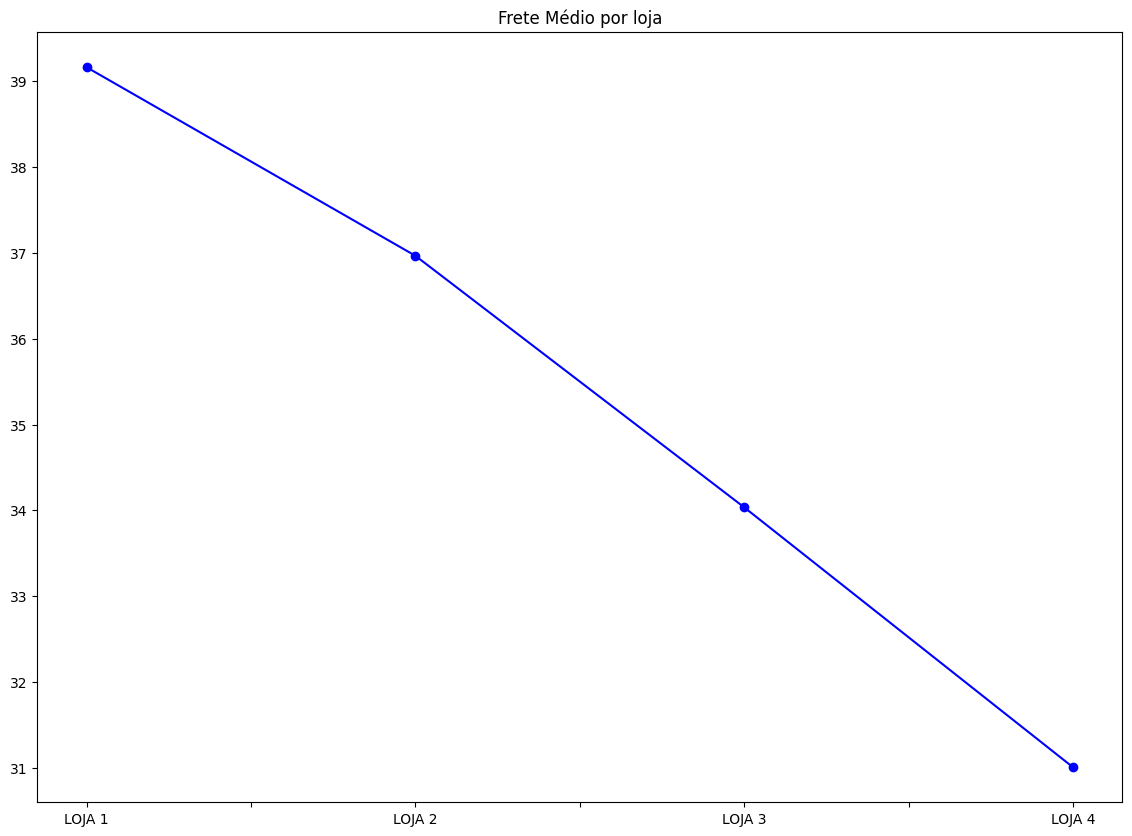

In [144]:
frete_medio_por_loja = pd.Series([frete_medio_loja.iloc[0], frete_medio_loja2.iloc[0], frete_medio_loja3.iloc[0], frete_medio_loja4.iloc[0]],
                                index=['LOJA 1', 'LOJA 2', 'LOJA 3', 'LOJA 4'])
frete_medio_por_loja.plot(kind='line', figsize=(14, 10), color='blue', title="Frete Médio por loja", marker='o');

Olá seu José tudo bem?

Após constantes analises de faturamento e de desempenho das lojas cheguei a conclusão que a venda da "loja" é melhor em sucesso. Pois mesmo que seja lider em faturamento a margem de gastos em frete é a maior disparada. Fazendo que as vendas não sejam tão positivas.

As outras lojas por menos faturamento que tenha ainda rodam quase o mesmo tanto que ela fazendo ser muito interessante a venda. E a mais logica.

A loja 3 por relação frete, faturamento e fluxo de vendas vem a ser mais lucrativo. Observando tambem os produtos menos vendidos, na loja 3 ele é onde a margem mionima é 35 unidades.


/tmp/ipython-input-3371710135.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = todos_dados.groupby([lat_bins, lon_bins]).size().unstack(fill_value=0)


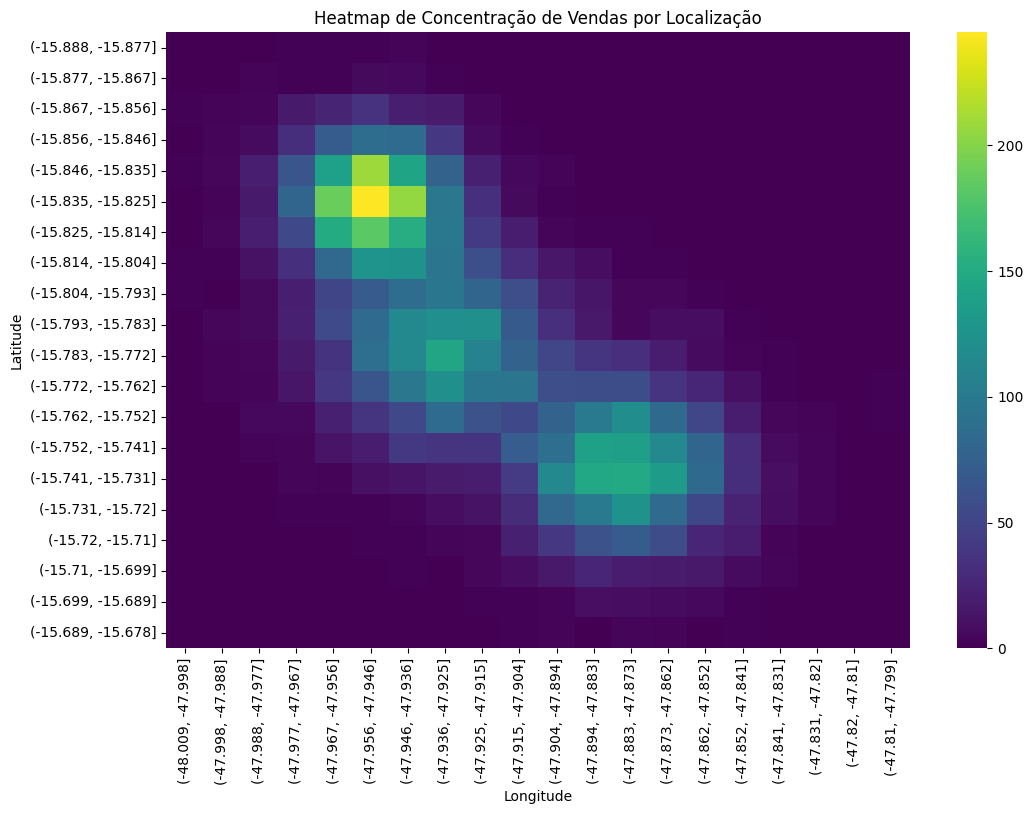

In [145]:
# Create bins for latitude and longitude
lat_bins = pd.cut(todos_dados['lat'], bins=20)
lon_bins = pd.cut(todos_dados['lon'], bins=20)

# Group by bins and count the number of sales in each bin
heatmap_data = todos_dados.groupby([lat_bins, lon_bins]).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap de Concentração de Vendas por Localização')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()